# This is project is to predict the wellhead pressure and flow pattern within the well

![shale well](img/shallwellimg.jpg)

### Import modules

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

%matplotlib inline

### Read raw data

In [5]:
df=pd.read_csv('simple_well2.csv')
dfnoise=pd.read_csv('simple_well_noise3.csv')

In [6]:
df.head()

,Date,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1/1/2020,1.990,439.6,4429.671236,5646.8,0.082286,0.809676,0.838839,403668.6203,0.522158,2.567768,0.013021,0.273833,4,2175.632949,212.158344
1,1/2/2020,1.979,429.6,3954.486042,5594.4,0.083133,0.732753,0.824077,369734.8323,0.527079,2.323320,0.012940,0.275160,4,2187.198066,210.639192
2,1/3/2020,1.969,419.9,3554.119221,5542.8,0.083925,0.667531,0.809393,341074.8608,0.531691,2.116113,0.012864,0.276514,4,2197.358736,209.096588
3,1/4/2020,1.959,410.6,3213.437317,5491.9,0.084655,0.611674,0.794856,316619.2477,0.535965,1.938724,0.012791,0.277891,4,2206.134095,207.534762
4,1/5/2020,1.949,401.6,2920.977411,5441.7,0.085334,0.563410,0.780499,295569.5475,0.539954,1.785498,0.012722,0.279288,4,2213.688390,205.957465


In [7]:
df.drop(columns='Date', inplace=True)

In [8]:
dfnoise.drop(columns='Date', inplace=True)

In [9]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1.990,439.6,4429.671236,5646.8,0.082286,0.809676,0.838839,403668.6203,0.522158,2.567768,0.013021,0.273833,4,2175.632949,212.158344
1,1.979,429.6,3954.486042,5594.4,0.083133,0.732753,0.824077,369734.8323,0.527079,2.323320,0.012940,0.275160,4,2187.198066,210.639192
2,1.969,419.9,3554.119221,5542.8,0.083925,0.667531,0.809393,341074.8608,0.531691,2.116113,0.012864,0.276514,4,2197.358736,209.096588
3,1.959,410.6,3213.437317,5491.9,0.084655,0.611674,0.794856,316619.2477,0.535965,1.938724,0.012791,0.277891,4,2206.134095,207.534762
4,1.949,401.6,2920.977411,5441.7,0.085334,0.563410,0.780499,295569.5475,0.539954,1.785498,0.012722,0.279288,4,2213.688390,205.957465


In [10]:
df['FlowPatternGasLiquid6'].nunique()

2

zero hot encoding

In [11]:
df2=pd.get_dummies(df['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [12]:
dfnoise2=pd.get_dummies(dfnoise['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [13]:
df2.head()

,FlowPattern_3,FlowPattern_4
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [14]:
df=pd.concat([df,df2],axis=1)

In [15]:
dfnoise=pd.concat([dfnoise,dfnoise2],axis=1)

In [16]:
df.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [17]:
dfnoise.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [18]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,1.990,439.6,4429.671236,5646.8,0.082286,0.809676,0.838839,403668.6203,0.522158,2.567768,0.013021,0.273833,2175.632949,212.158344,0,1
1,1.979,429.6,3954.486042,5594.4,0.083133,0.732753,0.824077,369734.8323,0.527079,2.323320,0.012940,0.275160,2187.198066,210.639192,0,1
2,1.969,419.9,3554.119221,5542.8,0.083925,0.667531,0.809393,341074.8608,0.531691,2.116113,0.012864,0.276514,2197.358736,209.096588,0,1
3,1.959,410.6,3213.437317,5491.9,0.084655,0.611674,0.794856,316619.2477,0.535965,1.938724,0.012791,0.277891,2206.134095,207.534762,0,1
4,1.949,401.6,2920.977411,5441.7,0.085334,0.563410,0.780499,295569.5475,0.539954,1.785498,0.012722,0.279288,2213.688390,205.957465,0,1


In [19]:
dfnoise.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,2.002,442.2,4589.139400,5714.6,0.081595,0.839249,0.845649,413949.5027,0.511382,2.653231,0.012656,0.273348,2218.335761,212.651966,0,1
1,1.937,423.2,4049.393707,5706.3,0.079080,0.752242,0.836687,371353.2559,0.490838,2.372266,0.012323,0.274702,2258.367024,211.128585,0,1
2,1.922,413.6,3596.768652,5487.4,0.082463,0.668271,0.810318,343398.8686,0.532550,2.128514,0.013427,0.276586,2132.427828,209.239809,0,1
3,1.988,419.2,3261.638877,5458.9,0.086243,0.619788,0.792928,322576.7052,0.550711,1.968633,0.013022,0.277707,2178.909530,207.699399,0,1
4,1.978,407.6,2999.843801,5332.9,0.088403,0.571403,0.773257,306047.9193,0.575918,1.823825,0.013569,0.279261,2119.901822,206.199223,0,1


In [20]:
y_pre=df['FINAPRESS']
X_pre=df.drop(columns=['FINAPRESS','FINATEMP'], axis=1)

In [21]:
y_hol=df['HoldupFractionLiquid6']
X_hol=df.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)

In [22]:
y_pat=df[['FlowPattern_3','FlowPattern_4']]
X_pat=df.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)

In [23]:
y_noisepre=dfnoise['FINAPRESS']
X_noisepre=dfnoise.drop(columns=['FINAPRESS','FINATEMP'], axis=1)
y_noisehol=dfnoise['HoldupFractionLiquid6']
X_noisehol=dfnoise.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)
y_noisepat=dfnoise[['FlowPattern_3','FlowPattern_4']]
X_noisepat=dfnoise.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)


### Plot the data

In [24]:
def four_y_plot(paraa, labela, parab, labelb, parac, labelc, parad, labeld, labelx, title):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
    
    fig, host = plt.subplots(figsize=(10, 8))
    fig.subplots_adjust(right=1)
    
    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.1))
    par3.spines["right"].set_position(("axes", 1.2))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    make_patch_spines_invisible(par3)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)
    par3.spines["right"].set_visible(True)
    
    p1, = host.plot(paraa, "b-", label=labela)
    p2, = par1.plot(parab, "r-", label=labelb)
    p3, = par2.plot(parac, "g-", label=labelc)
    p4, = par3.plot(parad, "black", label=labeld)
    
    # host.set_xlim(0, 250)
    # host.set_ylim(0, 2.2)
    # par1.set_ylim(0, 500)
    # par2.set_ylim(1, 5000)
    # par3.set_ylim(1, 6000)
    
    host.set_xlabel(labelx, fontsize=14)
    host.set_ylabel(labela, fontsize=14)
    par1.set_ylabel(labelb, fontsize=14)
    par2.set_ylabel(labelc, fontsize=14)
    par3.set_ylabel(labeld, fontsize=14)
    
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    par3.yaxis.label.set_color(p4.get_color())
    
    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), labelsize=12)
    par1.tick_params(axis='y', colors=p2.get_color(), labelsize=12)
    par2.tick_params(axis='y', colors=p3.get_color(), labelsize=12)
    par3.tick_params(axis='y', colors=p4.get_color(), labelsize=12)
    host.tick_params(axis='x', labelsize=14)
    
    lines = [p1, p2, p3, p4]
    
    host.legend(lines, [l.get_label() for l in lines], fontsize=14)
    plt.title(title, fontsize=16)
    
    plt.show()

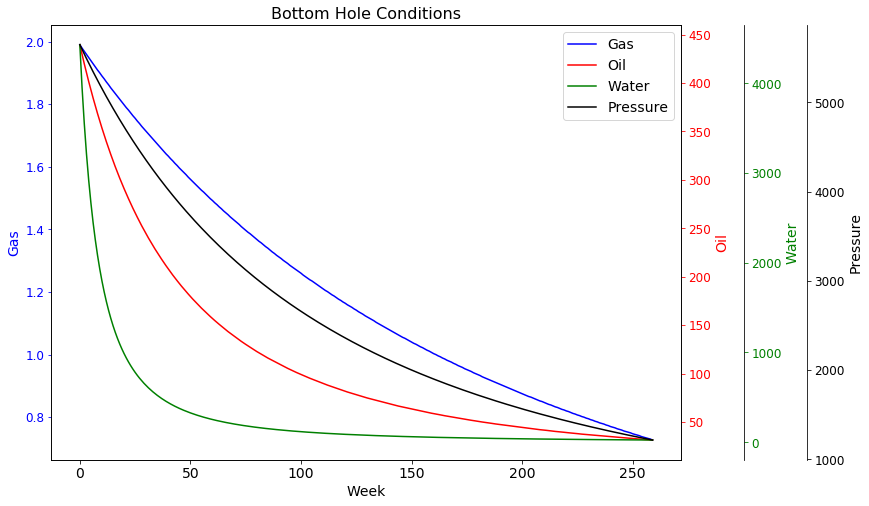

In [25]:
four_y_plot(df['Gas Flow_MMSCFD'], "Gas",
            df['Oil_bpd'], "Oil", 
            df['Water_bpd'],"Water",
            df['FWHP_psig'], "Pressure",
            "Week",
            "Bottom Hole Conditions")

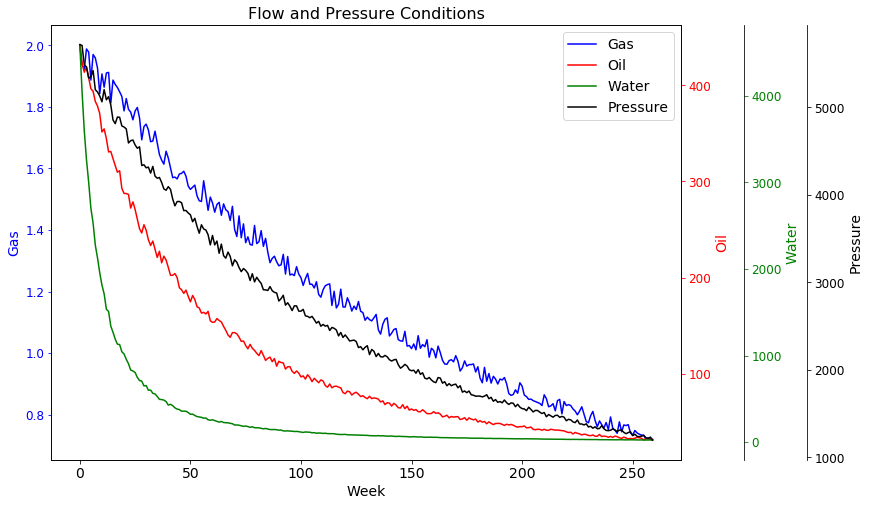

In [26]:
four_y_plot(dfnoise['Gas Flow_MMSCFD'], "Gas",
            dfnoise['Oil_bpd'], "Oil", 
            dfnoise['Water_bpd'],"Water",
            dfnoise['FWHP_psig'], "Pressure",
            "Week",
            "Flow and Pressure Conditions")

Prepare train and test data

In [27]:
X_pre= preprocessing.StandardScaler().fit(X_pre).transform(X_pre)
X_pre[0:5]
X_hol= preprocessing.StandardScaler().fit(X_hol).transform(X_hol)
X_hol[0:5]

array([[ 2.23970334,  3.42406948,  6.58216053,  2.56736951, -0.91667945,
         6.08774454,  5.96778178, -1.1171822 ,  6.10578084, -0.97945762,
        -1.55850943,  1.62196475, -2.1015867 ,  2.1015867 ],
       [ 2.20859484,  3.31882994,  5.82415528,  2.52325256, -0.67955852,
         5.44879228,  5.34489299, -1.1025325 ,  5.46206381, -0.9953094 ,
        -1.55156806,  1.6381069 , -2.1015867 ,  2.1015867 ],
       [ 2.18031439,  3.21674759,  5.18549869,  2.47980915, -0.45787437,
         4.90702618,  4.8188104 , -1.08880367,  4.91641874, -1.01042225,
        -1.54448407,  1.65228878, -2.1015867 ,  2.1015867 ],
       [ 2.15203393,  3.11887482,  4.64205021,  2.43695509, -0.25349493,
         4.44305372,  4.36990303, -1.07608214,  4.44929304, -1.02469809,
        -1.53727698,  1.6645371 , -2.1015867 ,  2.1015867 ],
       [ 2.12375347,  3.02415924,  4.17552442,  2.39469038, -0.06353338,
         4.04215813,  3.98351463, -1.06420598,  4.04579491, -1.03825211,
        -1.52996661,  1.67

In [28]:
X_noisepre= preprocessing.StandardScaler().fit(X_noisepre).transform(X_noisepre)

X_noisehol= preprocessing.StandardScaler().fit(X_noisehol).transform(X_noisehol)

In [29]:
X_train0=X_pre[0:182]
y_train0=y_pre[0:182]
X_test0=X_pre[182:]
y_test0=y_pre[182:]
# hold up data
X_hol_train0=X_hol[0:182]
y_hol_train0=y_hol[0:182]
X_hol_test0=X_hol[182:]
y_hol_test0=y_hol[182:]

In [30]:
X_noisetrain0=X_noisepre[0:182]
y_noisetrain0=y_noisepre[0:182]
X_noisetest0=X_noisepre[182:]
y_noisetest0=y_noisepre[182:]
# hold up data
X_hol_noisetrain0=X_noisehol[0:182]
y_hol_noisetrain0=y_noisehol[0:182]
X_hol_noisetest0=X_noisehol[182:]
y_hol_noisetest0=y_noisehol[182:]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_pre[0:182],y_pre[0:182], test_size=0.05,random_state=21)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
y_test.shape[0]

Train set: (172, 14) (172,)
Test set: (10, 14) (10,)


10

# *SVM*

In [32]:
from sklearn import svm
from sklearn import metrics
from sklearn import model_selection



In [33]:

# Parameters for smooth line input 
svr_rbf = svm.SVR(kernel='rbf', C=3000, gamma=0.0019, epsilon=0.1)
# svr_rbf = svm.SVR(C=100000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    #kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
svr_lin = svm.SVR(kernel='linear', C=52, gamma=0.1, epsilon=0.1)
svr_poly = svm.SVR(kernel='poly',gamma=1, degree=3, epsilon=.1,
               coef0=2.1)

clf=svr_lin.fit(X_train, y_train)
print(clf.score(X_test0,y_test0))
y_hat=svr_lin.predict(X_test0)

# print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))

0.9957277628332906


## Hyperparameter tuning

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.
C_range = 10. ** np.arange(-3, 6)
gamma_range = 10. ** np.arange(-5, 4)
param_grid = dict(gamma=gamma_range, C=C_range)

X=X_train0
y=y_train0

grid = GridSearchCV(svm.SVR(), param_grid=param_grid, refit=True, verbose=3)
grid.fit(X, y)
print("The best classifier is: ", grid.best_estimator_)

total=   0.0s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............. C=100.0, gamma=1000.0, score=-25.213, total=   0.0s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] .............. C=100.0, gamma=1000.0, score=-2.546, total=   0.0s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............. C=100.0, gamma=1000.0, score=-43.724, total=   0.0s
[CV] C=100.0, gamma=1000.0 ...........................................
[CV] ............ C=100.0, gamma=1000.0, score=-191.624, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............ C=1000.0, gamma=1e-05, score=-460.703, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] ............. C=1000.0, gamma=1e-05, score=-24.542, total=   0.0s
[CV] C=1000.0, gamma=1e-05 ...........................................
[CV] .............. C=1000.0, gamma=1e-05, score=-3.453, total=

In [34]:
def cross_valuations(svr_, Xdata, ydata, nsplit, s1, l1, s2, l2, s3, l3):
    
    kfold = model_selection.KFold(n_splits=nsplit, random_state=21, shuffle=True)
    
    scores = [s1, s2, s3]
    labels = [l1, l2, l3]
    
    for ix, score in enumerate(scores):
        results = model_selection.cross_val_score(svr_, Xdata, ydata, cv=kfold, scoring=scores[ix])
        print("SVR", svr_.kernel,labels[ix],format(results.mean(),'.4f'), format(results.std(),'.4f'))
    print('\n')   
    
   

Evaluate different algorithms

In [35]:
svrs = [svr_rbf, svr_lin, svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_train0,
                 y_train0,
                 7,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -3.0306 1.0940
SVR rbf RMSE: -4.6216 1.8650
SVR rbf R^2: 0.9999 0.0001


SVR linear MAE: -3.3257 1.1908
SVR linear RMSE: -5.6133 2.4541
SVR linear R^2: 0.9999 0.0001


SVR poly MAE: -0.6349 0.1565
SVR poly RMSE: -0.8813 0.2341
SVR poly R^2: 1.0000 0.0000




In [36]:
def three_svr_plot(svr1, label1, svr2, label2, svr3, label3, trainx, trainy, testx, testy, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    svrs = [svr1, svr2, svr3]
    kernel_label = [label1, label2, label3]
    model_color = ['b', 'c', 'g']
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 12), sharey=True)
    for ix, svr in enumerate(svrs):
        y_hat=svr.fit(trainx, trainy).predict(testx)
        
        MAE=format(metrics.mean_absolute_error(testy, y_hat),'.3f')
        MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
        R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
        axes[ix].plot(y_hat, color=model_color[ix], lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(kernel_label[ix], MAE, R2))
        axes[ix].plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
        axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                        ncol=1, fancybox=False, shadow=False, fontsize=14)
    fig.text(0.5, 0.04, labelx, ha='center', va='center', fontsize=12)
    fig.text(0.06, 0.5, labely, ha='center', va='center', rotation='vertical', fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

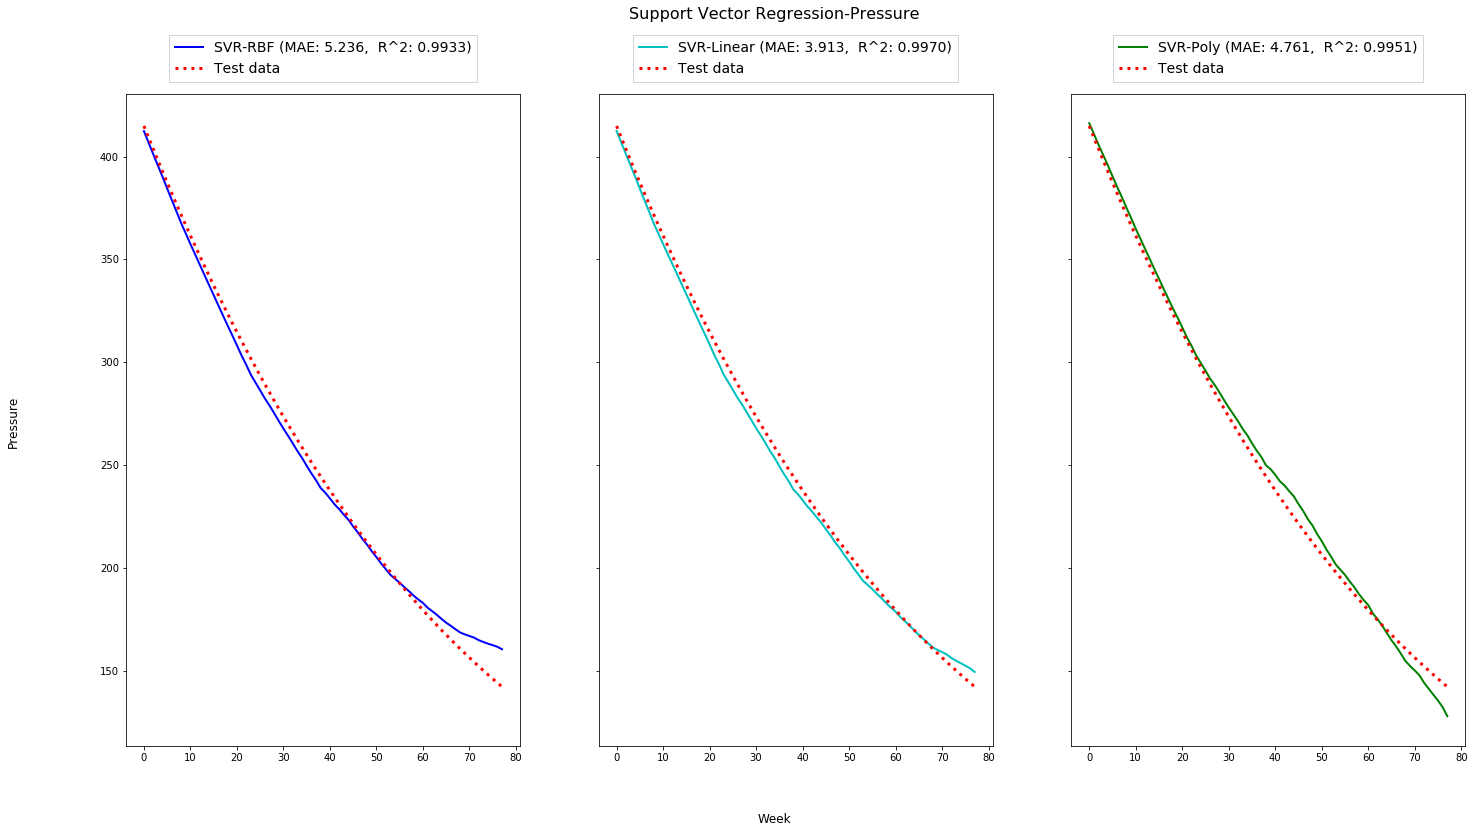

In [49]:
three_svr_plot(svr_rbf, "SVR-RBF",
               svr_lin, "SVR-Linear",
               svr_poly, "SVR-Poly",
               X_train0,
               y_train0,
               X_test0,
               y_test0,
               "Week",
               "Pressure",
               "Support Vector Regression-Pressure")

## Noisey data

In [38]:
# Paramters for noise input
svr_rbf = svm.SVR(kernel='rbf', C=6000, gamma=0.004, epsilon=0.01)
svr_lin = svm.SVR(kernel='linear', C=150, gamma=0.1, epsilon=0.1)
svr_poly = svm.SVR(kernel='poly',gamma=0.2, degree=4, epsilon=0.1,
               coef0=5)



In [39]:
svrs = [svr_rbf, svr_lin, svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_train0,
                 y_train0,
                 7,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -1.7754 0.7780
SVR rbf RMSE: -2.9298 1.6661
SVR rbf R^2: 1.0000 0.0000


SVR linear MAE: -2.5682 1.1872
SVR linear RMSE: -4.7170 2.5745
SVR linear R^2: 0.9999 0.0001


SVR poly MAE: -0.6088 0.0770
SVR poly RMSE: -0.7838 0.0815
SVR poly R^2: 1.0000 0.0000




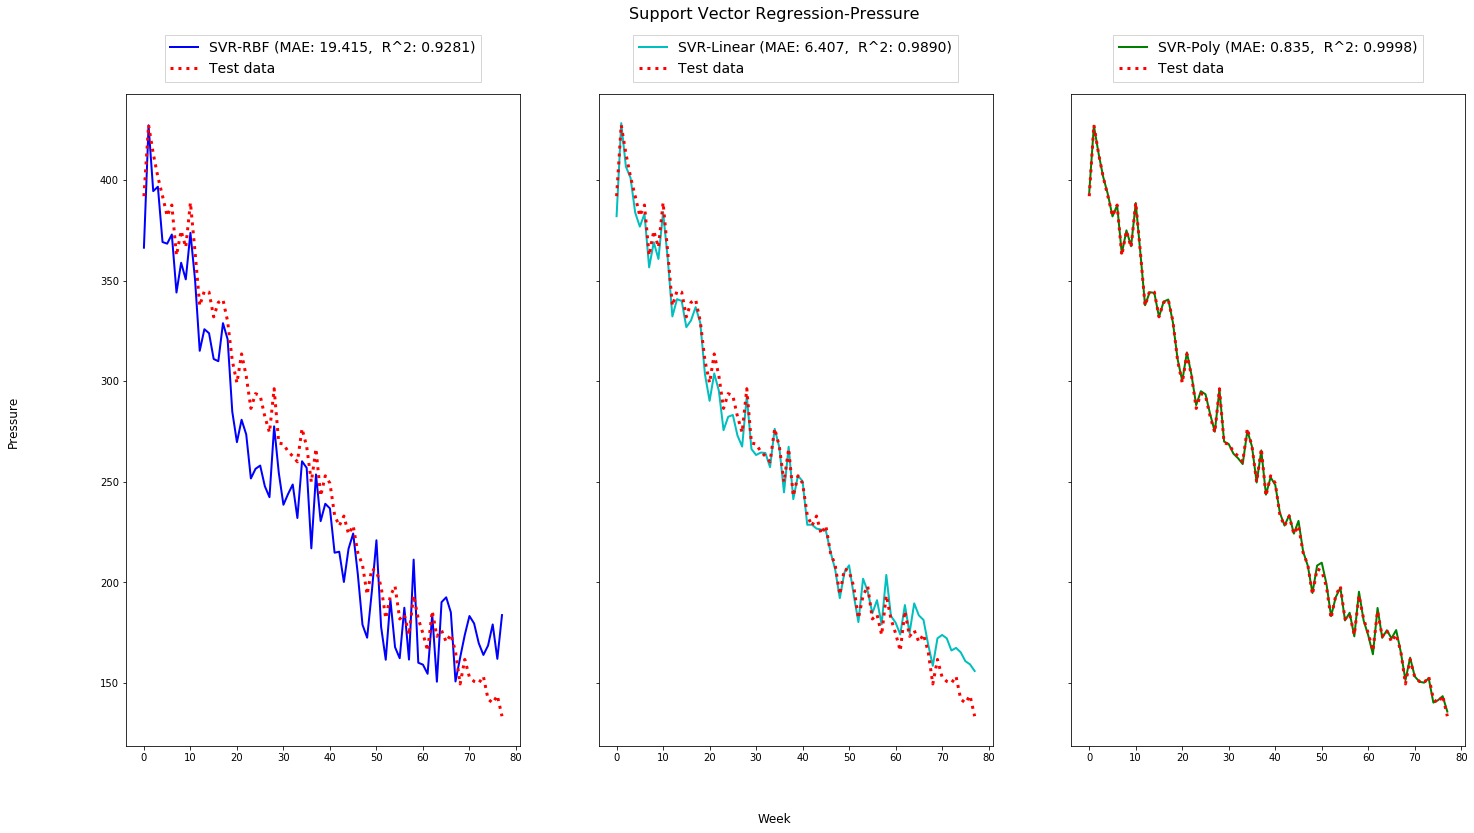

In [40]:
three_svr_plot(svr_rbf, "SVR-RBF",
               svr_lin, "SVR-Linear",
               svr_poly, "SVR-Poly",
               X_noisetrain0,
               y_noisetrain0,
               X_noisetest0,
               y_noisetest0,
               "Week",
               "Pressure",
               "Support Vector Regression-Pressure")

Predict Holdup

In [41]:
hol_svr_rbf = svm.SVR(kernel='rbf', C=10, gamma=0.001, epsilon=0.0001)
hol_svr_lin = svm.SVR(kernel='linear', C=0.2, gamma=0.005, epsilon=0.0001)
hol_svr_poly = svm.SVR(kernel='poly',gamma=0.01, degree=3, epsilon=.0001,
               coef0=0.6)

svrs = [hol_svr_rbf, hol_svr_lin, hol_svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_hol_train0,
                 y_hol_train0,
                 10,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -0.0029 0.0011
SVR rbf RMSE: -0.0059 0.0022
SVR rbf R^2: 0.9936 0.0111


SVR linear MAE: -0.0021 0.0007
SVR linear RMSE: -0.0041 0.0017
SVR linear R^2: 0.9965 0.0067


SVR poly MAE: -0.0003 0.0001
SVR poly RMSE: -0.0005 0.0002
SVR poly R^2: 1.0000 0.0001




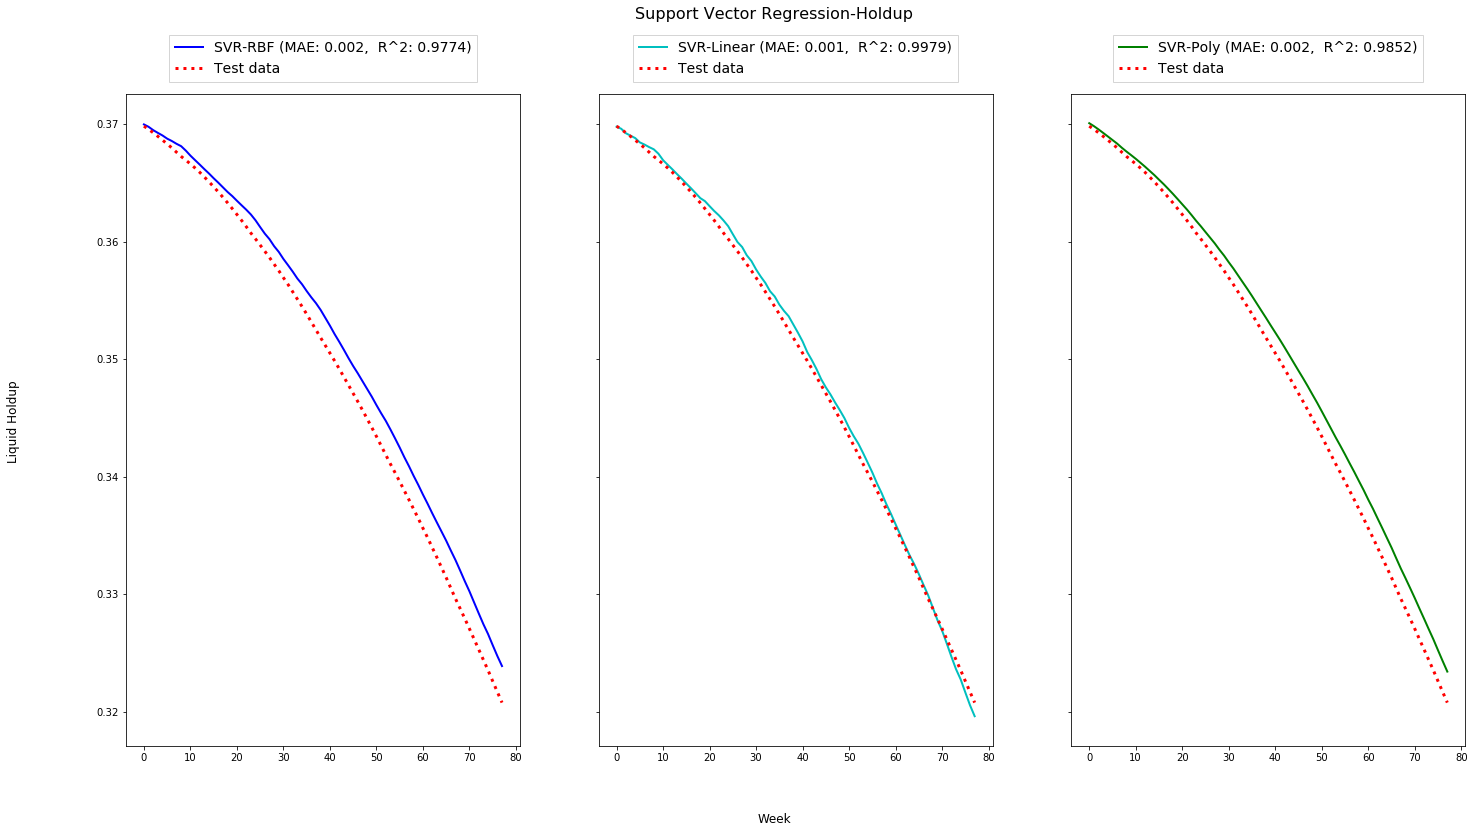

In [42]:
three_svr_plot(hol_svr_rbf, "SVR-RBF",
               hol_svr_lin, "SVR-Linear",
               hol_svr_poly, "SVR-Poly",
               X_hol_train0,
               y_hol_train0,
               X_hol_test0,
               y_hol_test0,
               "Week",
               "Liquid Holdup",
               "Support Vector Regression-Holdup")

In [43]:
hol_svr_rbf = svm.SVR(kernel='rbf', C=90, gamma=0.001, epsilon=0.0001)
hol_svr_lin = svm.SVR(kernel='linear', C=0.8, gamma=0.004, epsilon=0.0001)
hol_svr_poly = svm.SVR(kernel='poly',gamma=0.01, degree=4, epsilon=.00001,
               coef0=0.6)

svrs = [hol_svr_rbf, hol_svr_lin, hol_svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_hol_noisetrain0,
                 y_hol_noisetrain0,
                 10,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -0.0015 0.0004
SVR rbf RMSE: -0.0028 0.0009
SVR rbf R^2: 0.9988 0.0019


SVR linear MAE: -0.0017 0.0005
SVR linear RMSE: -0.0029 0.0008
SVR linear R^2: 0.9988 0.0016


SVR poly MAE: -0.0018 0.0004
SVR poly RMSE: -0.0033 0.0010
SVR poly R^2: 0.9983 0.0028




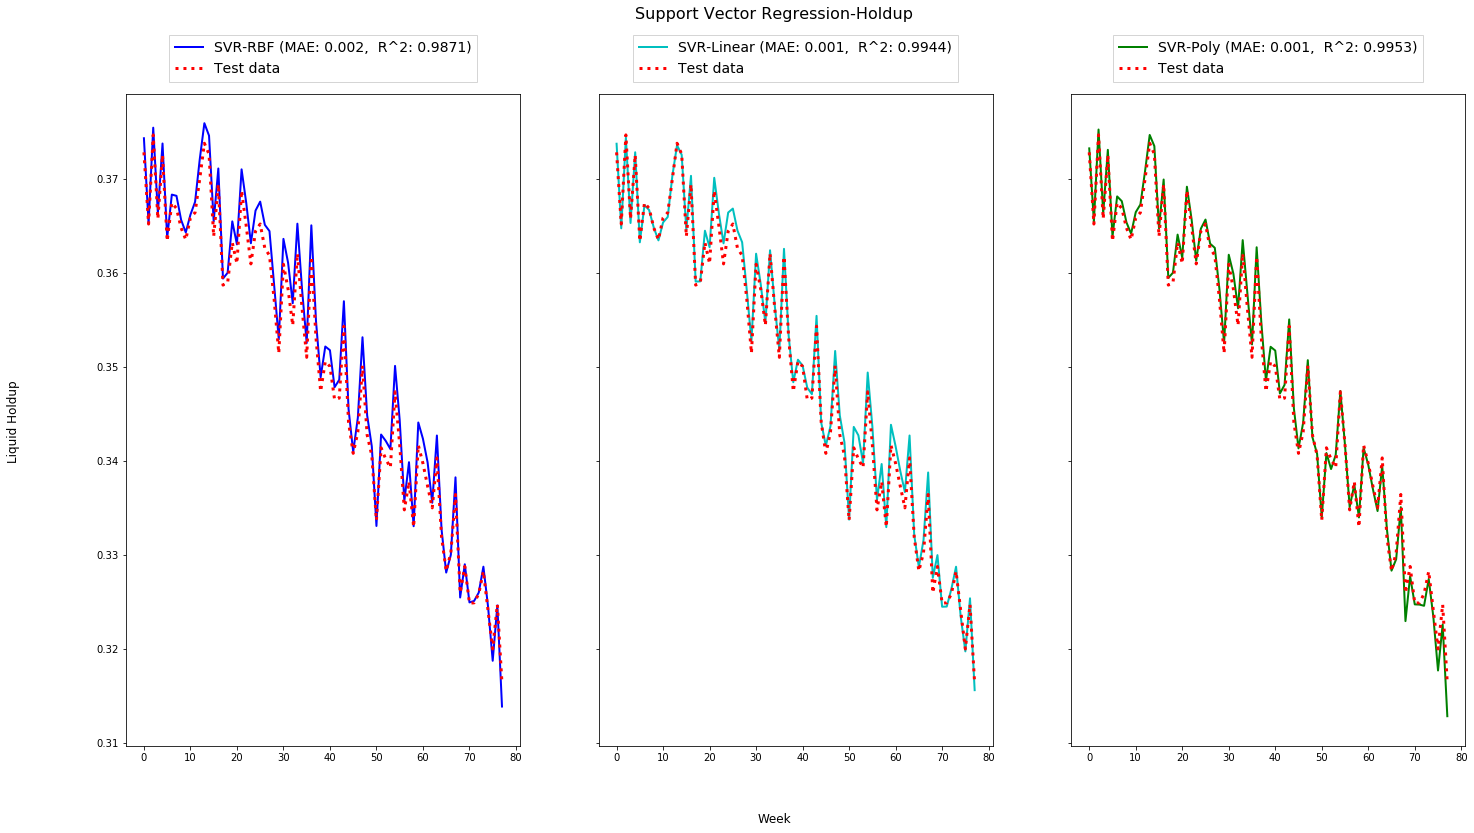

In [44]:
three_svr_plot(hol_svr_rbf, "SVR-RBF",
               hol_svr_lin, "SVR-Linear",
               hol_svr_poly, "SVR-Poly",
               X_hol_noisetrain0,
               y_hol_noisetrain0,
               X_hol_noisetest0,
               y_hol_noisetest0,
               "Week",
               "Liquid Holdup",
               "Support Vector Regression-Holdup")

In [45]:
def comp_plot(ml1, label1, trainx, trainy, testx, testy, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    fig= plt.figure(figsize=(12, 10))
   
    y_hat=ml1.fit(trainx, trainy).predict(testx)
        
    MAE=format(metrics.mean_absolute_error(testy, y_hat),'.3f')
    MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
    R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
    plt.plot(y_hat, color='blue', lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(label1, MAE, R2))
    plt.plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
    plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.1),fontsize=12)
    plt.xlabel(labelx, fontsize=12)
    plt.ylabel(labely, fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

## Model evaluation modules

In [55]:
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

## Ridge, Lasso, Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor



In [198]:
X_train=X_noisetrain0
y_train=y_noisetrain0

X_test=X_noisetest0
y_test=y_noisetest0

rreg = Ridge(alpha=0.001)
lareg= Lasso(alpha=1)
linreg=LinearRegression()
sgdreg=SGDRegressor(alpha=0.5)



kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(rreg, X_train, y_train, cv=kfold)
print("Cross Val Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


rreg.fit(X_train, y_train)
y_pred = rreg.predict(X_test)

MAE=format(metrics.mean_absolute_error(y_noisetest0, y_pred),'.3f')
MSE=format(metrics.mean_squared_error(y_noisetest0, y_pred),'.2f')
R2=format(metrics.r2_score(y_noisetest0, y_pred),'.4f')       

lin_mse = mean_squared_error(y_pred, y_noisetest0)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: %.4f' % lin_rmse)
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:',  R2)

Cross Val Accuracy: 99.99% (0.00%)
RMSE: 19.4695
MAE: 14.288
MSE: 379.06
R2: 0.9420


In [225]:
type(y_pred)

numpy.ndarray

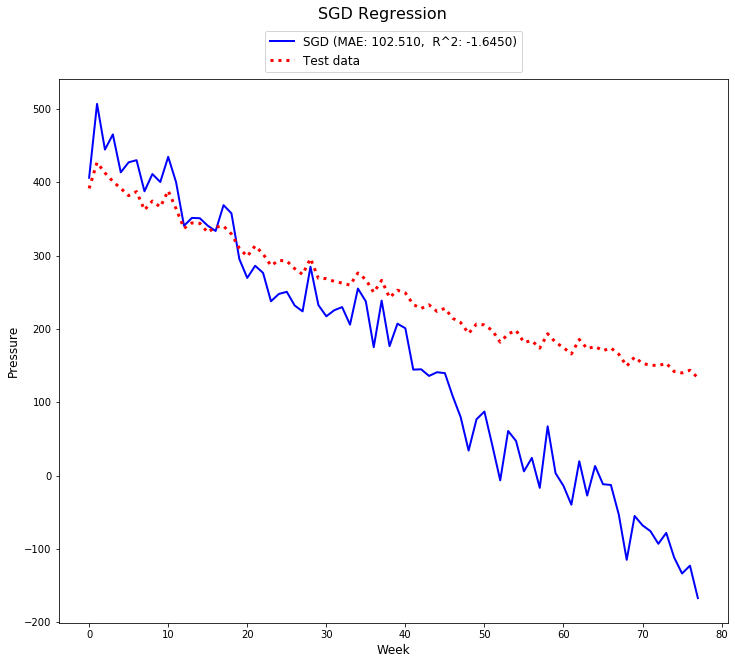

In [199]:
comp_plot(sgdreg, "SGD",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "SGD Regression")

In [103]:
def cross_valuations2(svr_, Xdata, ydata, nsplit, s1, l1, s2, l2, s3, l3):
    
    kfold = model_selection.KFold(n_splits=nsplit, random_state=21, shuffle=True)
    
    scores = [s1, s2, s3]
    labels = [l1, l2, l3]
    
    for ix, score in enumerate(scores):
        results = model_selection.cross_val_score(svr_, Xdata, ydata, cv=kfold, scoring=scores[ix])
        print(str(svr_)[0:5],labels[ix],format(results.mean(),'.4f'), format(results.std(),'.4f'))
    print('\n')   
    

In [104]:
linregs = [rreg, lareg, linreg]
for i in range(len(linregs)):
    cross_valuations2(linregs[i],
                 X_train0,
                 y_train0,
                 7,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )

Ridge MAE: -2.0950 0.3811
Ridge RMSE: -2.7960 0.5462
Ridge R^2: 1.0000 0.0000


Lasso MAE: -6.2528 0.8327
Lasso RMSE: -7.2873 0.8503
Lasso R^2: 0.9998 0.0001


Linea MAE: -1.2393 0.1061
Linea RMSE: -1.6061 0.1775
Linea R^2: 1.0000 0.0000


C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6966.755367685344, tolerance: 6159.7553937228095
  positive)
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6966.755367685344, tolerance: 6159.7553937228095
  positive)
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Obj

C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8949.268597355003, tolerance: 6935.285358453806
  positive)


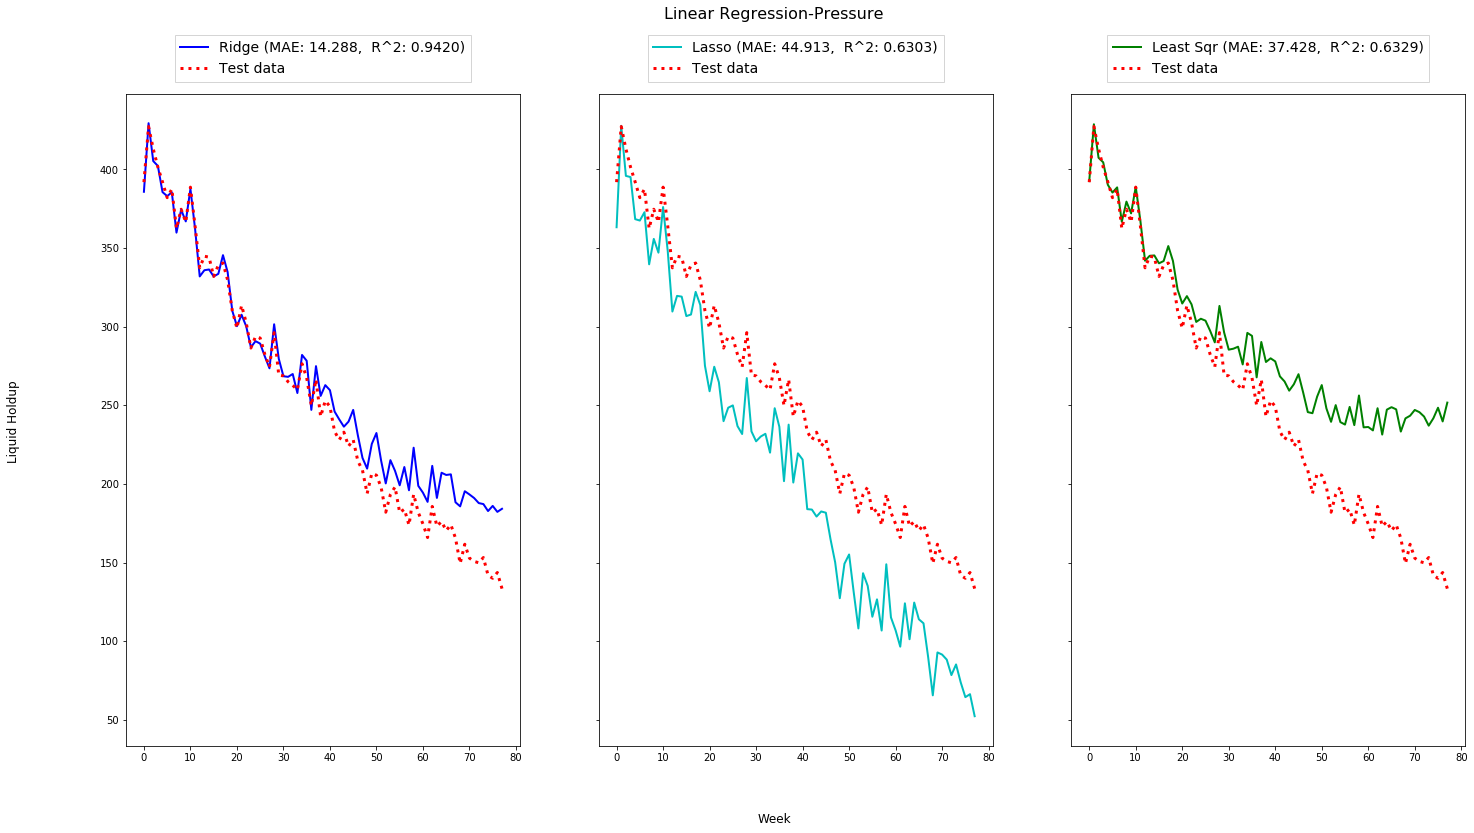

In [94]:
three_svr_plot(rreg, "Ridge",
               lareg, "Lasso",
               linreg, "Least Sqr",
               X_noisetrain0,
               y_noisetrain0,
               X_noisetest0,
               y_noisetest0,
               "Week",
               "Liquid Holdup",
               "Linear Regression-Pressure")

## Grid search parameter

In [188]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0.00001])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.7782738031615682
0.01


## Random search paramter

In [189]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand
# load the diabetes datasets

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_test, y_test)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018FA807B608>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.6345271708262865
0.018805062789112537


## SGD Regression

In [187]:
alphas = np.array([0.1,1,2,5,10,100,1000,10000])
l1_ratios=np.array([0,0.2,0.5,0.7,1])
epsilons=np.array([0.1,0.01,0.001])
power_ts=np.array([0.1,0.25,0.5,1,2])

params=dict(alpha=alphas)

# create and fit a ridge regression model, testing each alpha
model = SGDRegressor()
grid = GridSearchCV(estimator=model, param_grid=params)
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-01, 1.e+00, 2.e+00, 5.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
-2.94172103198

In [195]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand
# load the diabetes datasets

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = SGDRegressor()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_test, y_test)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_st

# Gradient Boost

In [200]:
from sklearn.ensemble import GradientBoostingRegressor


X_train=X_noisetrain0
y_train=y_noisetrain0

X_test=X_noisetest0
y_test=y_noisetest0

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbrt= GradientBoostingRegressor(**params)


kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(gbrt, X_train, y_train, cv=kfold)
print("Cross Val Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


gbrt.fit(X_noisetrain0, y_noisetrain0)
y_pred = gbrt.predict(X_noisetest0)

MAE=format(metrics.mean_absolute_error(y_noisetest0, y_pred),'.3f')
MSE=format(metrics.mean_squared_error(y_noisetest0, y_pred),'.2f')
R2=format(metrics.r2_score(y_noisetest0, y_pred),'.4f')       

lin_mse = mean_squared_error(y_pred, y_noisetest0)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: %.4f' % lin_rmse)
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:',  R2)


Cross Val Accuracy: 99.86% (0.05%)
RMSE: 181.2771
MAE: 162.550
MSE: 32861.41
R2: -4.0291


## GB

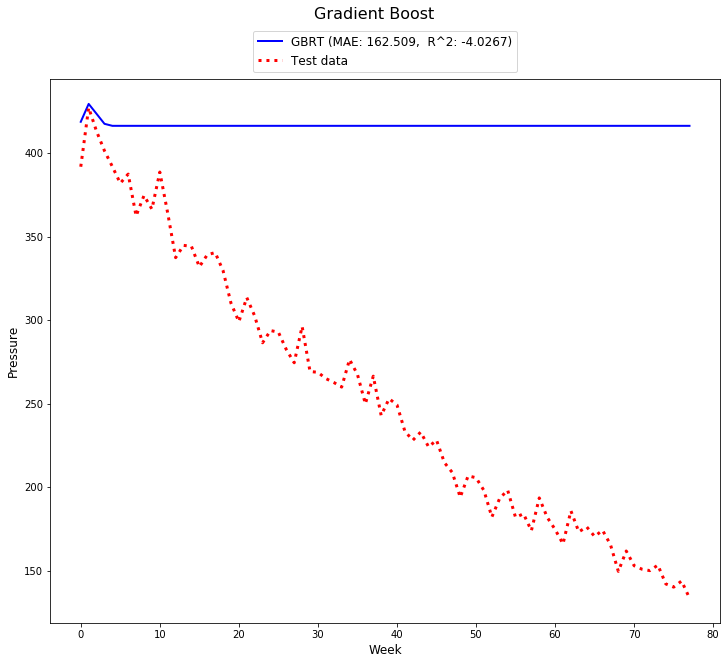

In [201]:
comp_plot(gbrt, "GBRT",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "Gradient Boost")

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
params = {'n_estimators': 500, 'max_depth': 30, 'random_state': 0,}

RFR = RandomForestRegressor(**params)

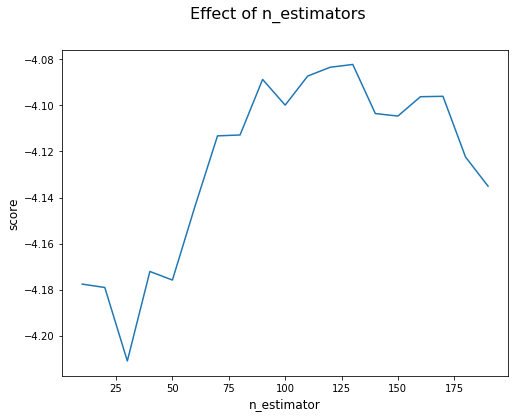

In [102]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    RFR.set_params(n_estimators=n)
    RFR.fit(X_train, y_train)
    scores.append(RFR.score(X_test, y_test))
fig= plt.figure(figsize=(8, 6))
plt.xlabel("n_estimator",fontsize=12)
plt.ylabel("score",fontsize=12)
fig.suptitle("Effect of n_estimators", fontsize=16)
plt.plot(estimators, scores)
plt.show()

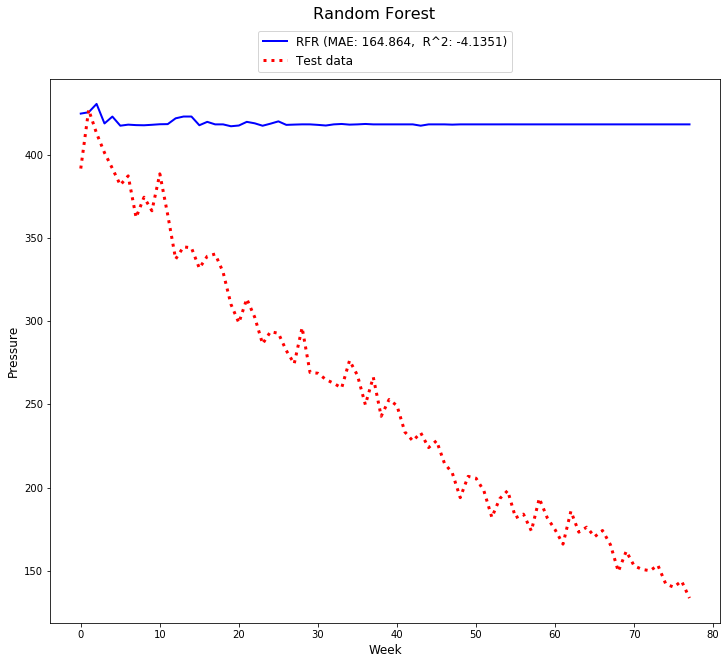

In [103]:
comp_plot(RFR, "RFR",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "Random Forest")

# XGBoost

In [104]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

In [105]:
params={'colsample_bytree': 0.7587948587257435, 'gamma': 0.022613644455269033, 'learning_rate': 0.1275990992289793, 'max_depth': 5, 'n_estimators': 144, 'subsample': 0.7085396127095583}

xgbr = xgb.XGBRegressor(**params)

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

MAE=format(metrics.mean_absolute_error(y_test, y_pred),'.3f')
MSE=format(metrics.mean_squared_error(y_test, y_pred),'.2f')
R2=format(metrics.r2_score(y_test, y_pred),'.4f')       

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: %.4f' % lin_rmse)
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:',  R2)

C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
[10:08:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 187.9341
MAE: 166.574
MSE: 35319.23
R2: -4.4053


[10:08:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


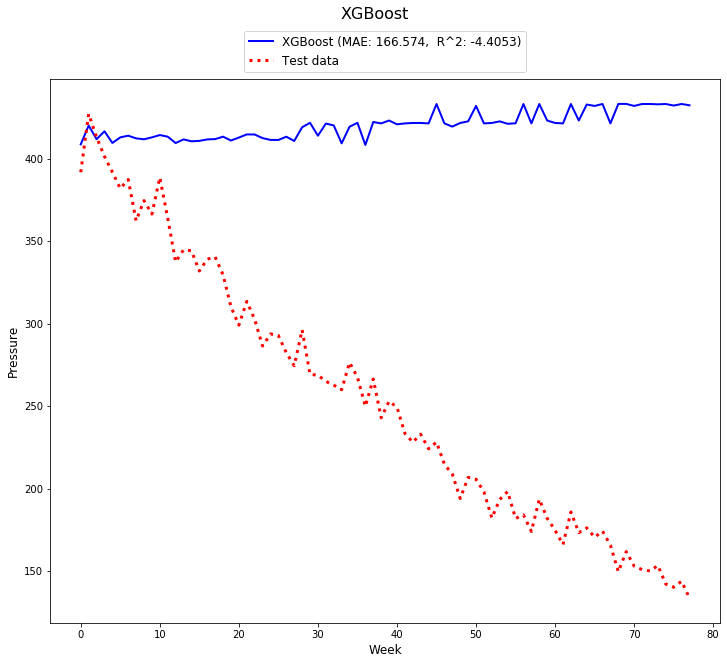

In [106]:
comp_plot(xgbr, "XGBoost",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "XGBoost")

In [107]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [108]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [109]:
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

[10:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
187.93410706742787
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Hyperparameter tuning

In [110]:
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)

ar is now deprecated in favor of reg:squarederror.
[10:09:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
[10:09:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squar

# Deep Learning

## Deep Neural Netowrk

In [202]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

import seaborn as sb

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


Using TensorFlow backend.


In [233]:
NN_model = Sequential()

In [234]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

In [235]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [206]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

In [207]:
optimizer1=tf.keras.optimizers.Adam(0.01)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1920      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,785
Trainable params: 166,785
Non-trainable params: 0
_________________________________________________________________


In [208]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [209]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

2/500
145/145 [==============================] - 0s 138us/step - loss: 10.4335 - mean_absolute_error: 10.4335 - val_loss: 15.6436 - val_mean_absolute_error: 15.6436

Epoch 00412: val_loss did not improve from 12.95341
Epoch 413/500
145/145 [==============================] - 0s 131us/step - loss: 8.7086 - mean_absolute_error: 8.7086 - val_loss: 14.3612 - val_mean_absolute_error: 14.3612

Epoch 00413: val_loss did not improve from 12.95341
Epoch 414/500
145/145 [==============================] - 0s 151us/step - loss: 6.8080 - mean_absolute_error: 6.8080 - val_loss: 13.6750 - val_mean_absolute_error: 13.6750

Epoch 00414: val_loss did not improve from 12.95341
Epoch 415/500
145/145 [==============================] - 0s 172us/step - loss: 11.0740 - mean_absolute_error: 11.0740 - val_loss: 16.9864 - val_mean_absolute_error: 16.9864

Epoch 00415: val_loss did not improve from 12.95341
Epoch 416/500
145/145 [==============================] - 0s 248us/step - loss: 8.3591 - mean_absolute_error:

In [211]:
# Load wights file of the best model :
wights_file = 'Weights-256--12.95341.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [212]:
predictions = NN_model.predict(X_noisetest0)

In [228]:
predictions

array([[441.9598 ],
       [452.3376 ],
       [447.8593 ],
       [441.63156],
       [440.15527],
       [439.9445 ],
       [436.63156],
       [429.65253],
       [435.72363],
       [433.9991 ],
       [439.1373 ],
       [427.42606],
       [416.0442 ],
       [416.50937],
       [416.60068],
       [419.85858],
       [419.75406],
       [427.96994],
       [421.09167],
       [414.1564 ],
       [414.4319 ],
       [411.3185 ],
       [409.48325],
       [411.87933],
       [409.8844 ],
       [407.1543 ],
       [407.00598],
       [404.05383],
       [414.68552],
       [416.48557],
       [402.8499 ],
       [402.3484 ],
       [406.2134 ],
       [396.41705],
       [408.08554],
       [414.4855 ],
       [396.4595 ],
       [409.73956],
       [414.39426],
       [410.46213],
       [409.48343],
       [415.88336],
       [410.10574],
       [403.64026],
       [412.93253],
       [425.7896 ],
       [414.07745],
       [399.81323],
       [410.44025],
       [419.8257 ],


In [223]:
type(y_test)

pandas.core.series.Series

In [227]:
metrics.r2_score(y_test, predictions)

-4.047412009283183

In [231]:
def NN_comp_plot(dnn, testy, pred, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    fig= plt.figure(figsize=(12, 10))
   
    y_hat=predictions
        
    MAE=format(metrics.mean_absolute_error(testy, y_hat),'.3f')
    MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
    R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
    plt.plot(y_hat, color='blue', lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(dnn, MAE, R2))
    plt.plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
    plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.1),fontsize=12)
    plt.xlabel(labelx, fontsize=12)
    plt.ylabel(labely, fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

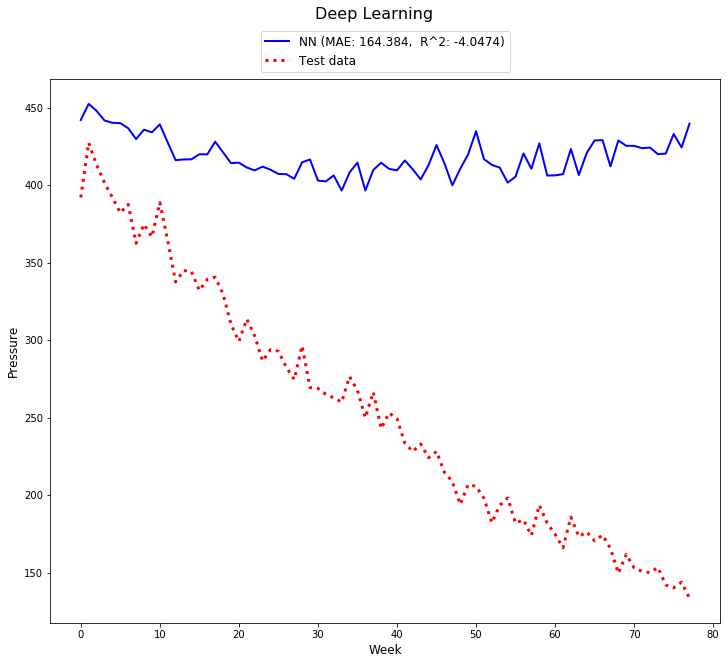

In [232]:
NN_comp_plot("NN",
             y_test,
             predictions,
             "Week",
             "Pressure",
             "Deep Learning")